# AutoEncoders for Dimensionality Reduction on Sensor Data

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from sklearn.datasets import make_blobs

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
from tensorflow.keras.optimizers import SGD

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# Loading Data

In [44]:
from google.colab import files
uploded = files.upload()

Saving grouped_Activities.csv to grouped_Activities (1).csv


In [45]:
data = pd.read_csv('grouped_Activities.csv')

In [46]:
data.head(3)

,Unnamed: 0,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity
0,0,2021-02-15 13:50:21.550,-0.158969,2.803969,9.085058,-0.043932,-0.045130,0.045454,-19.597500,-5.601242,-41.832703,-90.007644,-15.340794,-0.056757,Sitting
1,1,2021-02-15 13:50:21.600,0.105081,2.691852,9.735305,-0.015150,0.017822,-0.039482,-19.790108,-5.628992,-41.756622,-90.030670,-15.489331,-0.163034,Sitting
2,2,2021-02-15 13:50:21.650,-0.065414,2.734813,9.690698,0.029210,-0.072317,0.006180,-19.635098,-5.536165,-42.205139,-90.047929,-15.306761,-0.206336,Sitting


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9585 entries, 0 to 9584
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9585 non-null   int64  
 1   Timestamp   9585 non-null   object 
 2   Acc_X       9585 non-null   float64
 3   Acc_Y       9585 non-null   float64
 4   Acc_Z       9585 non-null   float64
 5   AngV_X      9585 non-null   float64
 6   AngV_Y      9585 non-null   float64
 7   AngV_Z      9585 non-null   float64
 8   Mag_X       9585 non-null   float64
 9   Mag_Y       9585 non-null   float64
 10  Mag_Z       9585 non-null   float64
 11  Orin_X      9585 non-null   float64
 12  Orin_Y      9585 non-null   float64
 13  Orin_Z      9585 non-null   float64
 14  Activity    9585 non-null   object 
dtypes: float64(12), int64(1), object(2)
memory usage: 1.1+ MB


In [48]:
data = data.drop("Unnamed: 0", axis=1)

In [49]:
df = data.copy()

In [50]:
df.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity
0,2021-02-15 13:50:21.550,-0.158969,2.803969,9.085058,-0.043932,-0.045130,0.045454,-19.597500,-5.601242,-41.832703,-90.007644,-15.340794,-0.056757,Sitting
1,2021-02-15 13:50:21.600,0.105081,2.691852,9.735305,-0.015150,0.017822,-0.039482,-19.790108,-5.628992,-41.756622,-90.030670,-15.489331,-0.163034,Sitting
2,2021-02-15 13:50:21.650,-0.065414,2.734813,9.690698,0.029210,-0.072317,0.006180,-19.635098,-5.536165,-42.205139,-90.047929,-15.306761,-0.206336,Sitting
3,2021-02-15 13:50:21.700,0.288300,2.505939,9.488469,0.007310,-0.021133,-0.040295,-19.892584,-5.790623,-41.786987,-90.010922,-15.431007,-0.321902,Sitting
4,2021-02-15 13:50:21.751,-0.041763,2.713407,9.748029,0.076889,-0.033310,-0.016419,-19.826864,-5.771675,-41.874054,-90.017554,-15.397740,-0.532236,Sitting


<b>Drop all timestamps in Magnetic, AngularVelocity and Orientation Dataframes; However, leave "Timestamp" for the Acceleration dataframe</b>

In [51]:
df.head(2)

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity
0,2021-02-15 13:50:21.550,-0.158969,2.803969,9.085058,-0.043932,-0.045130,0.045454,-19.597500,-5.601242,-41.832703,-90.007644,-15.340794,-0.056757,Sitting
1,2021-02-15 13:50:21.600,0.105081,2.691852,9.735305,-0.015150,0.017822,-0.039482,-19.790108,-5.628992,-41.756622,-90.030670,-15.489331,-0.163034,Sitting


#### Label Encoding the "Activity" column

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Activity_class = le.fit_transform(df['Activity'])

## PLEASE ASSUME THAT WE DID NOT KNOW THE LABLES (ACTIVITIES)
### We are grabing our features

In [53]:
feat = df.iloc[:, 1:-1]

In [54]:
feat.head()

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
0,-0.158969,2.803969,9.085058,-0.043932,-0.045130,0.045454,-19.597500,-5.601242,-41.832703,-90.007644,-15.340794,-0.056757
1,0.105081,2.691852,9.735305,-0.015150,0.017822,-0.039482,-19.790108,-5.628992,-41.756622,-90.030670,-15.489331,-0.163034
2,-0.065414,2.734813,9.690698,0.029210,-0.072317,0.006180,-19.635098,-5.536165,-42.205139,-90.047929,-15.306761,-0.206336
3,0.288300,2.505939,9.488469,0.007310,-0.021133,-0.040295,-19.892584,-5.790623,-41.786987,-90.010922,-15.431007,-0.321902
4,-0.041763,2.713407,9.748029,0.076889,-0.033310,-0.016419,-19.826864,-5.771675,-41.874054,-90.017554,-15.397740,-0.532236


## Scaling our features

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
# Note that we are using all the data! There is no "right" answer here (taking it as an unsupervised problem)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [57]:
scaled_data[0]

array([0.63600246, 0.49483597, 0.53844021, 0.48521266, 0.49799627,
       0.57719733, 0.28077626, 0.44563047, 0.06277288, 0.24884854,
       0.43246664, 0.49996546])

# Creating the Autoencoder

#### Defining the Encoder

In [58]:
# Structure 12 -->6  --> 3 -->6 --> 12

encoder = Sequential()
encoder.add(Dense(units=6, activation='relu', input_shape=[12]))
encoder.add(Dense(units=3, activation='relu'))

#### Defining the Decoder

In [59]:
decoder = Sequential()
decoder.add(Dense(units=6,activation='relu',input_shape=[3]))
decoder.add(Dense(units=12,activation='relu'))

#### Defining the Autoencoder
    * We are training the autoencoder together. Basically, the encoder and decoder are trained together.
    * We can have the encoder learn the best way to reduce the input features from 12 to 3 in order to enable the decoder to reproduce a similar output efficiently


In [60]:
autoencoder = Sequential([encoder,decoder])

#### Compile the Autoencoder

In [61]:
# we are using 'mse' since we are dealing with contineous values. We can also use Adam optimiser
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

#### Traning the Autoencoder

In [62]:
# notice we feed the data twice, basicialy like X and y
history = autoencoder.fit(scaled_data,scaled_data, epochs=10)

Epoch 1/10
300/300 [==============================] - 1s 1ms/step - loss: 0.0910
Epoch 2/10
300/300 [==============================] - 0s 971us/step - loss: 0.0592
Epoch 3/10
300/300 [==============================] - 0s 983us/step - loss: 0.0590
Epoch 4/10
300/300 [==============================] - 0s 943us/step - loss: 0.0585
Epoch 5/10
300/300 [==============================] - 0s 946us/step - loss: 0.0542
Epoch 6/10
300/300 [==============================] - 0s 982us/step - loss: 0.0540
Epoch 7/10
300/300 [==============================] - 0s 1ms/step - loss: 0.0418
Epoch 8/10
300/300 [==============================] - 0s 963us/step - loss: 0.0395
Epoch 9/10
300/300 [==============================] - 0s 1ms/step - loss: 0.0397
Epoch 10/10
300/300 [==============================] - 0s 964us/step - loss: 0.0392


In [63]:
scaled_data.shape

(9585, 12)

In [64]:
# We are Grabbing the encoder section which goes from 12 to 3. 
# We want it to predict from our scaled data

encoded_3dim = encoder.predict(scaled_data)

In [65]:
encoded_3dim.shape

(9585, 3)

In [66]:
encoded_3dim

array([[4.7225505e-04, 0.0000000e+00, 2.1590985e-01],
       [0.0000000e+00, 0.0000000e+00, 2.1832651e-01],
       [1.4805049e-04, 0.0000000e+00, 2.1639870e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 9.3741041e-01],
       [0.0000000e+00, 0.0000000e+00, 9.3291897e-01],
       [0.0000000e+00, 0.0000000e+00, 9.3814802e-01]], dtype=float32)

In [67]:
encoded_3dim_df = pd.DataFrame(encoded_3dim)

In [68]:
encoded_3dim_df.head(2)

,0,1,2
0,0.000472,0.0,0.215910
1,0.000000,0.0,0.218327


In [69]:
encoded_3dim_df.columns = ['X1','X2','X3']

In [70]:
encoded_3dim_df.head(3)

,X1,X2,X3
0,0.000472,0.0,0.215910
1,0.000000,0.0,0.218327
2,0.000148,0.0,0.216399


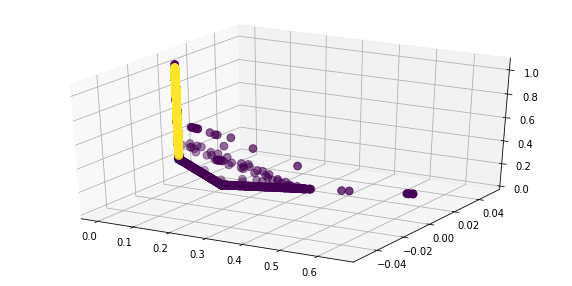

In [71]:
##%matplotlib notebook

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_3dim_df['X1'],encoded_3dim_df['X2'],encoded_3dim_df['X3'],c=Activity_class, s=60)

In [73]:
import plotly.express as px

fig = px.scatter_3d(x=encoded_3dim_df['X1'], y=encoded_3dim_df['X2'],z=encoded_3dim_df['X3'],color=Activity_class,
                  hover_data=[df['Activity']],labels={'x':'X1','y':'X2','z':'X3'})

fig.show()